In [1]:
# import the libraries as shown below

from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model

# Here InceptionResNetV2 model is implemented 

from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator,load_img
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [229, 229]
        
train_path = './Datasets/GreenHot(Dataset)/Training/'

In [3]:
# Import the Resnet50 or Resnet50 V2 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

InceptionResNetV2 = InceptionResNetV2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [4]:
# don't train existing weights
for layer in InceptionResNetV2.layers:
    layer.trainable = False

In [5]:
# useful for getting number of output classes
folders = glob('./Datasets/GreenHot(Dataset)/Training/*')

In [6]:
len(folders)

2

In [7]:
# our layers - you can add more if you want
x = Flatten()(InceptionResNetV2.output)

In [8]:
prediction = Dense(1, activation='sigmoid')(x)

# create a model object
model = Model(inputs=InceptionResNetV2.input, outputs=prediction)

In [9]:
# view the structure of the model
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 229, 229, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 114, 114, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 114, 114, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 114, 114, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

batch_normalization_154 (BatchN (None, 12, 12, 160)  480         conv2d_154[0][0]                 
__________________________________________________________________________________________________
activation_154 (Activation)     (None, 12, 12, 160)  0           batch_normalization_154[0][0]    
__________________________________________________________________________________________________
conv2d_152 (Conv2D)             (None, 12, 12, 192)  208896      block17_19_ac[0][0]              
__________________________________________________________________________________________________
conv2d_155 (Conv2D)             (None, 12, 12, 192)  215040      activation_154[0][0]             
__________________________________________________________________________________________________
batch_normalization_152 (BatchN (None, 12, 12, 192)  576         conv2d_152[0][0]                 
__________________________________________________________________________________________________
batch_norm

In [10]:
# view the structure of the model
model.compile(optimizer='Adamax',  #Adamax , RMSprop , Adagrad, 
              loss='binary_crossentropy',
              metrics=['accuracy','AUC','Precision','Recall'])

print("model compiled")
print(model.summary())

model compiled
Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 229, 229, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 114, 114, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 114, 114, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 114, 114, 32) 0           batch_normalization[0][0]        
________________________________________________________________________

activation_169 (Activation)     (None, 5, 5, 224)    0           batch_normalization_169[0][0]    
__________________________________________________________________________________________________
conv2d_167 (Conv2D)             (None, 5, 5, 192)    399360      block8_1_ac[0][0]                
__________________________________________________________________________________________________
conv2d_170 (Conv2D)             (None, 5, 5, 256)    172032      activation_169[0][0]             
__________________________________________________________________________________________________
batch_normalization_167 (BatchN (None, 5, 5, 192)    576         conv2d_167[0][0]                 
__________________________________________________________________________________________________
batch_normalization_170 (BatchN (None, 5, 5, 256)    768         conv2d_170[0][0]                 
__________________________________________________________________________________________________
activation

In [11]:
#Total BFlops
from model_profiler import model_profiler

Batch_size = 32
profile = model_profiler(model, Batch_size)

print(profile)

| Model Profile                    | Value         | Unit    |
|----------------------------------|---------------|---------|
| Selected GPUs                    | None Detected | GPU IDs |
| No. of FLOPs                     | 0.1322        | BFLOPs  |
| GPU Memory Requirement           | 5.0861        | GB      |
| Model Parameters                 | 54.3751       | Million |
| Memory Required by Model Weights | 207.4247      | MB      |


In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 50

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=90,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        brightness_range=[0.5,1.0],
        fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('./Datasets/GreenHot(Dataset)/Training/',
                                                 target_size = (229, 229),
                                                 batch_size = 50,
                                                 class_mode = 'binary')

test_set = validation_datagen.flow_from_directory('./Datasets/GreenHot(Dataset)/Testing/',
                                            target_size = (229, 229),
                                            batch_size = 50,
                                            class_mode = 'binary')

Found 1244 images belonging to 2 classes.
Found 218 images belonging to 2 classes.


In [13]:
len(training_set)

25

In [14]:
training_set.class_indices

{'Fire': 0, 'No_Fire': 1}

In [15]:
imgs ,labels = next(training_set)

In [16]:
from matplotlib import pyplot as plt
def plotImages(images_arr):
    fig, axes = plt.subplots(1,10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr,axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

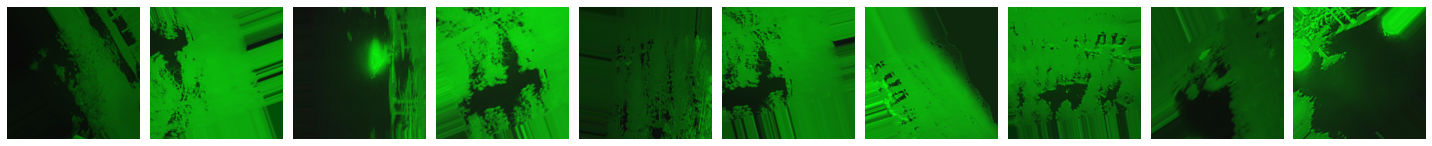

[1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0.
 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0.
 1. 0.]


In [17]:
plotImages(imgs)
print(labels)

In [18]:
#Add checkpoints 
from keras.callbacks import ModelCheckpoint
#filepath='saved_models/models.h5'
filepath="./FirevsNonFire_InceptionResNetV2_GH_transfer_learning_model_weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5" #File name includes epoch and validation accuracy.
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [21]:
history = model.fit(training_set,
          steps_per_epoch= 1000 // batch_size,
          epochs=10, 
          validation_data=test_set,
          validation_steps= 200 // batch_size)

Epoch 1/10
20/20 [==============================] - ETA: 0s - loss: 0.3811 - accuracy: 0.8602 - auc: 0.9324 - precision: 0.8216 - recall: 0.8475
Epoch 00001: val_accuracy improved from -inf to 0.88500, saving model to .\FirevsNonFire_InceptionResNetV2_GH_transfer_learning_model_weights-improvement-01-0.88.hdf5
20/20 [==============================] - 167s 8s/step - loss: 0.3811 - accuracy: 0.8602 - auc: 0.9324 - precision: 0.8216 - recall: 0.8475 - val_loss: 0.2932 - val_accuracy: 0.8850 - val_auc: 0.9520 - val_precision: 0.9726 - val_recall: 0.7717
Epoch 2/10
20/20 [==============================] - ETA: 0s - loss: 0.1980 - accuracy: 0.9316 - auc: 0.9757 - precision: 0.9275 - recall: 0.9049
Epoch 00002: val_accuracy did not improve from 0.88500
20/20 [==============================] - 154s 8s/step - loss: 0.1980 - accuracy: 0.9316 - auc: 0.9757 - precision: 0.9275 - recall: 0.9049 - val_loss: 0.3089 - val_accuracy: 0.8500 - val_auc: 0.9470 - val_precision: 0.8163 - val_recall: 0.8696


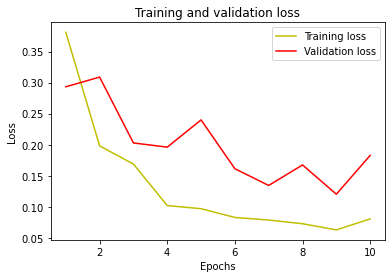

In [22]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

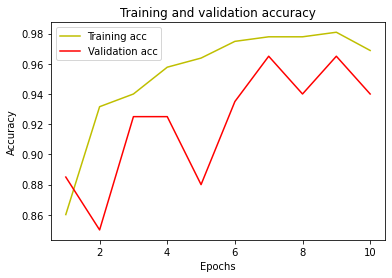

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.models import load_model

model.save('FirevsNonFire_InceptionResNetV2_transfer_learning_model_weights-improvement.h5')